### From Scratch Implemetation of a Multi Layer Perceptron with Backpropagation
### Author: @Samashi47

### 0- Imports:

In [1]:
import chadMLP as chad
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, auc, roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

### 1- Loading Datasets:

In [2]:
df = pd.read_csv('data/cleaned-eighthr-ozone-day-dataset.data', header=None)
iris = datasets.load_iris()
cancer = datasets.load_breast_cancer()

### 2- Loading Datasets:

In [3]:
X_iris = iris.data
y_iris = iris.target

X_cancer = cancer.data
y_cancer = cancer.target

X_ozone = df.iloc[:, :-1].values
y_ozone = df.iloc[:, -1].values

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)
X_train_ozone, X_test_ozone, y_train_ozone, y_test_ozone = train_test_split(X_ozone, y_ozone, test_size=0.2, random_state=42)

### 3- Training:

#### 3.1- Training on Iris Dataset:

##### 3.1.1- Fitting the model:

In [4]:
mlp_iris = chad.MLPClassifier(nFeats=X_iris.shape[1], hlnNeur=3, nClasses=np.unique(y_iris).shape[0], h_act='sigmoid',o_act='sigmoid', alpha=0.01)
mlp_iris.fit(X_train_iris, y_train_iris, epochs=100)
y_pred_iris = mlp_iris.predict(X_test_iris)

##### 3.1.2- Classification report:

In [5]:
print(classification_report(y_test_iris, y_pred_iris))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.11      0.20         9
           2       0.58      1.00      0.73        11

    accuracy                           0.73        30
   macro avg       0.86      0.70      0.64        30
weighted avg       0.85      0.73      0.66        30



##### 3.1.3- Confusion matrix:

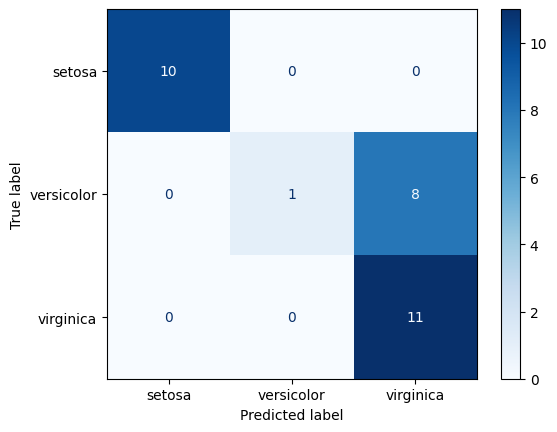

In [6]:
disp = ConfusionMatrixDisplay.from_predictions(y_true=y_test_iris, y_pred=y_pred_iris, display_labels=iris.target_names, cmap='Blues')
plt.show()

##### 3.1.4- ROC Curve

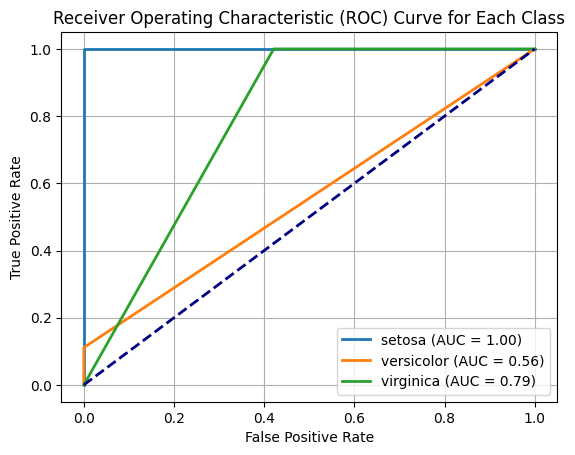

In [7]:
y_test_iris_bin = label_binarize(y_test_iris, classes=np.unique(y_iris))
y_pred_iris_bin = label_binarize(y_pred_iris, classes=np.unique(y_iris))

fpr_iris = dict()
tpr_iris = dict()
thresholds = dict()
auc_iris = dict()

for i in range(y_test_iris_bin.shape[1]):
    fpr_iris[i], tpr_iris[i], _ = roc_curve(y_test_iris_bin[:, i], y_pred_iris_bin[:, i])
    auc_iris[i] = roc_auc_score(y_test_iris_bin[:, i], y_pred_iris_bin[:, i])

for i in range(y_test_iris_bin.shape[1]):
    plt.plot(fpr_iris[i], tpr_iris[i], lw=2, label=f'{iris.target_names[i]} (AUC = {auc_iris[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### 3.2- Training on Cancer Dataset:

##### 3.2.1- Fitting the model:

In [8]:
mlp_cancer = chad.MLPClassifier(nFeats=X_cancer.shape[1], hlnNeur=3, nClasses=np.unique(y_cancer).shape[0], h_act='sigmoid',o_act='sigmoid', alpha=0.01)
mlp_cancer.fit(X_train_cancer, y_train_cancer, epochs=100)
y_pred_cancer = mlp_cancer.predict(X_test_cancer)

c:\Users\ah-ma\Documents\GitHub\Multi-Layer-Perceptron\chadMLP.py:24: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


##### 3.2.2- Classification report:

In [9]:
print(classification_report(y_test_cancer, y_pred_cancer))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.62      1.00      0.77        71

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



c:\Users\ah-ma\Documents\GitHub\Multi-Layer-Perceptron\.venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ah-ma\Documents\GitHub\Multi-Layer-Perceptron\.venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ah-ma\Documents\GitHub\Multi-Layer-Perceptron\.venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

##### 3.2.3- Confusion matrix:

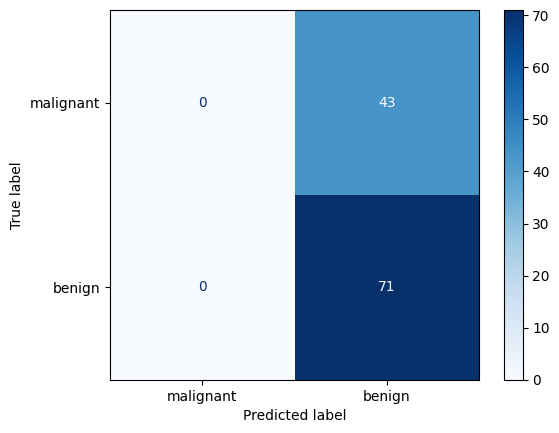

In [10]:
disp = ConfusionMatrixDisplay.from_predictions(y_true=y_test_cancer, y_pred=y_pred_cancer, display_labels=cancer.target_names, cmap='Blues')
plt.show()

##### 3.2.4- ROC Curve:

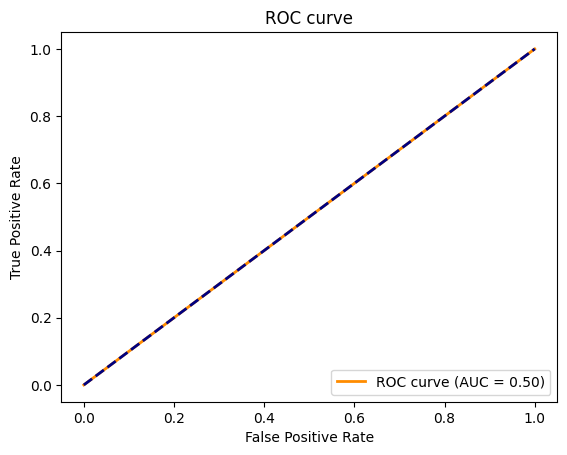

In [11]:
# Calculer FP ratio, TP ratio
fpr_cancer, tpr_cancer, _ = roc_curve(y_test_cancer, y_pred_cancer)
roc_auc_cancer = auc(fpr_cancer, tpr_cancer)

plt.figure()
plt.plot(fpr_cancer, tpr_cancer, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_cancer)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

#### 3.3- Training on Ozone Day (eighthr.data) Dataset:

##### 3.3.1- Fitting the model:

In [12]:
mlp_ozone = chad.MLPClassifier(nFeats=X_ozone.shape[1], hlnNeur=3, nClasses=np.unique(y_ozone).shape[0], h_act='sigmoid',o_act='sigmoid', alpha=0.01)
mlp_ozone.fit(X_train_ozone, y_train_ozone, epochs=100)
y_pred_ozone = mlp_ozone.predict(X_test_ozone)

c:\Users\ah-ma\Documents\GitHub\Multi-Layer-Perceptron\chadMLP.py:24: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


##### 3.3.2- Classification report:

In [13]:
print(classification_report(y_test_ozone, y_pred_ozone))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97       474
         1.0       0.00      0.00      0.00        33

    accuracy                           0.93       507
   macro avg       0.47      0.50      0.48       507
weighted avg       0.87      0.93      0.90       507



c:\Users\ah-ma\Documents\GitHub\Multi-Layer-Perceptron\.venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ah-ma\Documents\GitHub\Multi-Layer-Perceptron\.venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ah-ma\Documents\GitHub\Multi-Layer-Perceptron\.venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

##### 3.3.3- Confusion matrix:

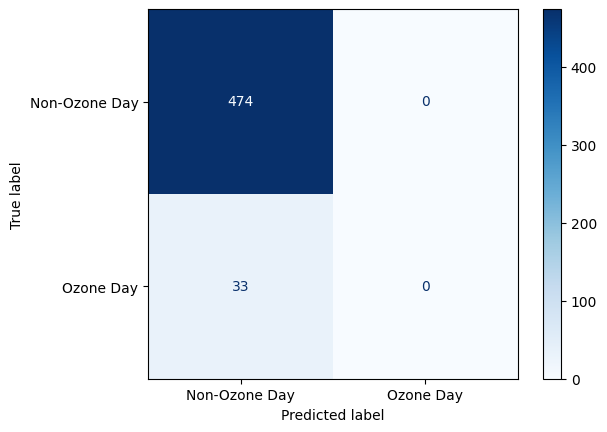

In [14]:
disp = ConfusionMatrixDisplay.from_predictions(y_true=y_test_ozone, y_pred=y_pred_ozone, display_labels=['Non-Ozone Day', 'Ozone Day'], cmap='Blues')
plt.show()

##### 3.3.4- ROC Curve:

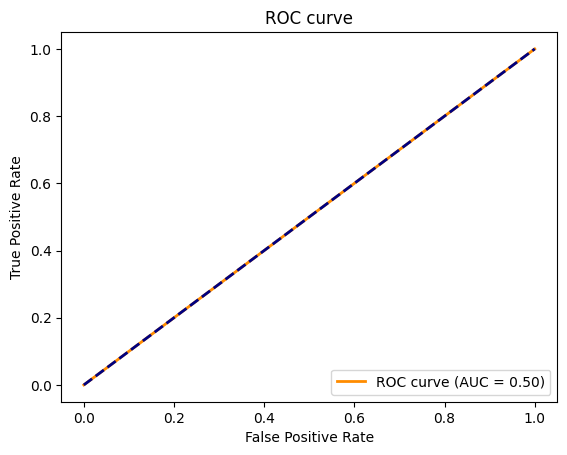

In [15]:
# Calculer FP ratio, TP ratio
fpr_ozone, tpr_ozone, _ = roc_curve(y_test_ozone, y_pred_ozone)
roc_auc_ozone = auc(fpr_ozone, tpr_ozone)

plt.figure()
plt.plot(fpr_ozone, tpr_ozone, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_ozone)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()